**Module 5 Coding Assignment: MDA on economic factors as predictors of S&P 500 index.**
We will apply MDA feature selection (FS) to find the most important factors that predict the sign of the S&P index monthly returns.


1. **Setting the random seed to 1, and using the same dataset as in the Module 5 assignment, compute the feature importance scores of each feature by applying the featImportance function (Snippet 8.8 in AFML) on the 10 cross validation sets within the train set defined there. Why can’t FS be applied to the train set as a whole? (Hint: see https://twitter.com/chanep/status/1056648839061520384?s=20) (2 pt)**

The feature importance score should be applied on the validation set because when we do the feature selection on the training set we could in a way overfit the model and if we calculate the feature importance score with the unseen test data on the the features from the training set we could get the featureImp score as zero.
The features selected from training set could perform really bad on the unseen test data. When a model's error is measured on the same data on which it is trained the outcome is overly optimistic and that would mean the model seems to work much better than it would do in reality.


In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X_data = pd.read_csv('/content/S_P_mnthly_returns_input-3.csv')
Y_data = pd.read_csv('/content/S_P_mnthly_returns_output-3.csv')

In [ ]:
X_data.head()

,yyyymm,ntis,infl,ltr,corpr,svar,d/p,d/y,e/p,d/e,tms,dfy,dfr,b/m_FD,tbl_FD,lty_FD
0,1945-12-01,0.025525,0.005525,0.0194,0.0133,0.001538,-3.269684,-3.337063,-2.894991,-0.374693,0.0161,0.0049,-0.0061,-0.216009,-2.99635,-1.507835
1,1946-01-01,0.027969,0.000000,0.0025,0.0128,0.002645,-3.327012,-3.255014,-2.983423,-0.343589,0.0161,0.0047,0.0103,-0.264780,-2.99635,-1.486065
2,1946-02-01,0.031091,-0.005495,0.0032,0.0034,0.005942,-3.245065,-3.290322,-2.932931,-0.312134,0.0160,0.0047,0.0002,-0.167204,-2.99635,-1.481915
3,1946-03-01,0.031188,0.011050,0.0010,0.0034,0.001497,-3.280469,-3.317389,-3.000167,-0.280302,0.0160,0.0047,0.0024,-0.190201,-2.99635,-1.474585
4,1946-04-01,0.031307,0.005464,-0.0135,-0.0043,0.001078,-3.317389,-3.339531,-3.059560,-0.257829,0.0169,0.0050,0.0092,-0.222940,-2.99635,-1.425691


In [ ]:
Y_data.head()

,yyyymm,ret
0,1945-12-01,1.0
1,1946-01-01,-1.0
2,1946-02-01,1.0
3,1946-03-01,1.0
4,1946-04-01,1.0


In [ ]:
X_data.set_index('yyyymm', inplace = True)
Y_data.set_index('yyyymm', inplace = True)
X_data.head()

,ntis,infl,ltr,corpr,svar,d/p,d/y,e/p,d/e,tms,dfy,dfr,b/m_FD,tbl_FD,lty_FD
yyyymm,,,,,,,,,,,,,,,
1945-12-01,0.025525,0.005525,0.0194,0.0133,0.001538,-3.269684,-3.337063,-2.894991,-0.374693,0.0161,0.0049,-0.0061,-0.216009,-2.99635,-1.507835
1946-01-01,0.027969,0.000000,0.0025,0.0128,0.002645,-3.327012,-3.255014,-2.983423,-0.343589,0.0161,0.0047,0.0103,-0.264780,-2.99635,-1.486065
1946-02-01,0.031091,-0.005495,0.0032,0.0034,0.005942,-3.245065,-3.290322,-2.932931,-0.312134,0.0160,0.0047,0.0002,-0.167204,-2.99635,-1.481915
1946-03-01,0.031188,0.011050,0.0010,0.0034,0.001497,-3.280469,-3.317389,-3.000167,-0.280302,0.0160,0.0047,0.0024,-0.190201,-2.99635,-1.474585
1946-04-01,0.031307,0.005464,-0.0135,-0.0043,0.001078,-3.317389,-3.339531,-3.059560,-0.257829,0.0169,0.0050,0.0092,-0.222940,-2.99635,-1.425691


In [ ]:
np.random.seed(1)

In [ ]:
X_data_2 = X_data.copy(deep=True)
y_data_2 = Y_data.copy(deep=True)

In [ ]:
def train_valid_test_split(df, trainFraction, validFraction):
  assert(trainFraction + validFraction < 1)
  X = df.copy()
  trainset=np.arange(np.round(trainFraction*X.shape[0]))
  validset=np.arange(trainset[-1]+1,trainset[-1]+1+np.round(validFraction*X.shape[0]))
  testset=np.arange(validset[-1]+1,X.shape[0])
  X_train, X_valid, X_test = X.iloc[trainset,], X.iloc[validset,], X.iloc[testset,]
  return X_train, X_valid, X_test

trainFrac=0.7
validFrac=0.2

X_train_data, X_valid_data, X_test_data=train_valid_test_split(X_data, trainFrac, validFrac)
Y_train_data, Y_valid_data, Y_test_data=train_valid_test_split(Y_data, trainFrac, validFrac)

In [ ]:
#Derived from Advances in Financial Machine Learning, pp 116-117, Marcos Lopez de Prado
from sklearn.model_selection._split import KFold
import datetime as dt

def featImpMDA_classify(clf,X,y,cv,scoring='neg_log_loss'):
  # feat importance based on OOS score reduction
  if scoring not in ['neg_log_loss', 'accuracy']:
    raise Exception('wrong scoring method.')
  print('start MDA',dt.datetime.now())

  from sklearn.metrics import log_loss, accuracy_score

  cvGen=KFold(n_splits=cv)
  scr0,scr1=pd.Series(),pd.DataFrame(columns=X.columns)
  for i,(train,test) in enumerate(cvGen.split(X=X)):
    print(' Split',i+1)
    X0,y0=X.iloc[train,:],y.iloc[train]
    X1,y1=X.iloc[test,:],y.iloc[test]
    fit=clf.fit(X=X0,y=y0)
    if scoring=='neg_log_loss':
      prob=fit.predict_proba(X1)
      scr0.loc[i]=-log_loss(y1,prob,labels=clf.classes_)
    else:
      pred=fit.predict(X1)
      scr0.loc[i]=accuracy_score(y1,pred)
    for j in X.columns:
      X1_=X1.copy(deep=True)
      np.random.shuffle(X1_[j].values) # permutation of a single column
      if scoring=='neg_log_loss':
        prob=fit.predict_proba(X1_)
        scr1.loc[i,j]=-log_loss(y1,prob,labels=clf.classes_)
    else:
      pred=fit.predict(X1_)
      scr1.loc[i,j]=accuracy_score(y1,pred)
  imp=(0-scr1).add(scr0,axis=0) #imp = scr1.add(scr0, axis = 0)
  imp =imp/(0-scr1) #imp=imp/-scr1
  imp=pd.concat({'mean':imp.mean(),'std':imp.std()*imp.shape[0]**-.5},axis=1)
  print('end MDA',dt.datetime.now())
  return imp


In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# featImpMDA_classify(clf,X,y,cv,scoring='neg_log_loss')

def featImportance(trnsX,cont,n_estimators=1000,cv=10,max_samples=1,
                   numThreads=24,pctEmbargo=0,scoring='accuracy',
                   method='MDA',minWLeaf=0):
  # feature importance from a random forest
  n_jobs=(-1 if numThreads>1 else 1)
  # run 1 thread with ht_helper in dirac1
  #1) prepare classifier,cv. max_features=1, to prevent masking
  clf=DecisionTreeClassifier(criterion='entropy',max_features=1,class_weight='balanced',min_weight_fraction_leaf=minWLeaf)

  clf=BaggingClassifier(base_estimator=clf,n_estimators=n_estimators,max_features=1,max_samples=max_samples,oob_score=True,n_jobs=n_jobs)

  fit=clf.fit(X=trnsX,y=cont)
  oob=fit.oob_score_
  imp,oos=featImpMDA_classify(clf,X=trnsX,y=cont,cv=cv,scoring=scoring)
  return imp,oob,oos

In [ ]:
def plot_importances(df_importances, save=None, xrot=0, tickstep=3,label_fontsize=12,figsize=None, scalefig=(1.0, 1.0), show=True, show_cutoff=False):
  """
  Given an array or data frame of importances, plot a horizontal bar chart
  showing the importance values.
  :param df_importances: A data frame with Feature, Importance columns
  :type df_importances: pd.DataFrame
  :param save: A filename identifying where to save the image.
  :param xrot: Degrees to rotate importance (X axis) labels
  :type xrot: int
  :param tickstep: How many ticks to skip in X axis
  :type tickstep: int
  :param label_fontsize: The font size for the column names and x ticks
  :type label_fontsize: int
  :param figsize: Specify width and height of image (width,height)
  :type figsize: 2-tuple of floats
  :param scalefig: Scale width and height of image (widthscale,heightscale)
  :type scalefig: 2-tuple of floats
  :param show: Execute plt.show() if true (default is True). Sometimes
  we want to draw multiple things before calling plt.show()
  :type show: bool
  :return: None
  SAMPLE CODE
  rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
  X_train, y_train = ..., ...
  rf.fit(X_train, y_train)
  imp = importances(rf, X_test, y_test)
  plot_importances(imp)
  """
  I = df_importances
  if figsize:
    fig = plt.figure(figsize=figsize)
  elif scalefig:
    fig = plt.figure()
    w, h = fig.get_size_inches()
    fig.set_size_inches(w * scalefig[0], h * scalefig[1], forward=True)
  else:
    fig = plt.figure()
  ax = plt.gca()
  labels = []
  for col in I.index:
    if isinstance(col, list):
      labels.append('\n'.join(col))
    else:
      labels.append(col)

  for tick in ax.get_xticklabels():
    tick.set_size(label_fontsize)
  for tick in ax.get_yticklabels():
    tick.set_size(label_fontsize)
  ax.barh(np.arange(len(I.index)), I.Importance, height=0.6, tick_label=labels)
  # rotate x-ticks
  if xrot is not None:
    plt.xticks(rotation=xrot)

  # xticks freq
  xticks = ax.get_xticks()
  nticks = len(xticks)
  new_ticks = xticks[np.arange(0, nticks, step=tickstep)]
  ax.set_xticks(new_ticks)

  if show_cutoff:
    # Plot the cutoff importance as vertical dotted line as per Figure 8.2 of AFML
    plt.axvline(1./df_importances.shape[0], linewidth = 1, color= 'r', linestyle = 'dotted')
    print('importance cutoff=', 1./df_importances.shape[0])
  if save:
    plt.savefig(save, bbox_inches="tight", pad_inches=0.03)
  if show:
    plt.show()

In [ ]:
clf=DecisionTreeClassifier(criterion='entropy',max_features=1,class_weight='balanced',min_weight_fraction_leaf=0, random_state=1)
clf=BaggingClassifier(base_estimator=clf,n_estimators=1000,max_features=1,max_samples=1.,
oob_score=True,n_jobs=-1,random_state=1)
mda_imps=featImpMDA_classify(clf,X_train_data,Y_train_data,cv=10, scoring='neg_log_loss')

start MDA 2023-10-10 06:45:32.058597
 Split 1
 Split 2
 Split 3
 Split 4
 Split 5
 Split 6
 Split 7
 Split 8
 Split 9
 Split 10
end MDA 2023-10-10 06:47:41.811683


In [ ]:
type(mda_imps)
print(mda_imps)


            mean       std
ntis    0.004699  0.002482
infl    0.000817  0.002542
ltr    -0.001965  0.005048
corpr  -0.003877  0.002027
svar   -0.009783  0.004284
d/p    -0.003041  0.003045
d/y     0.001870  0.004859
e/p     0.003815  0.004027
d/e    -0.001840  0.004675
tms    -0.000717  0.003485
dfy     0.000253  0.002662
dfr    -0.001243  0.003199
b/m_FD -0.005739  0.003528
tbl_FD  0.002112  0.001942
lty_FD  2.390696  0.088044


In [ ]:
import matplotlib.pyplot as plt

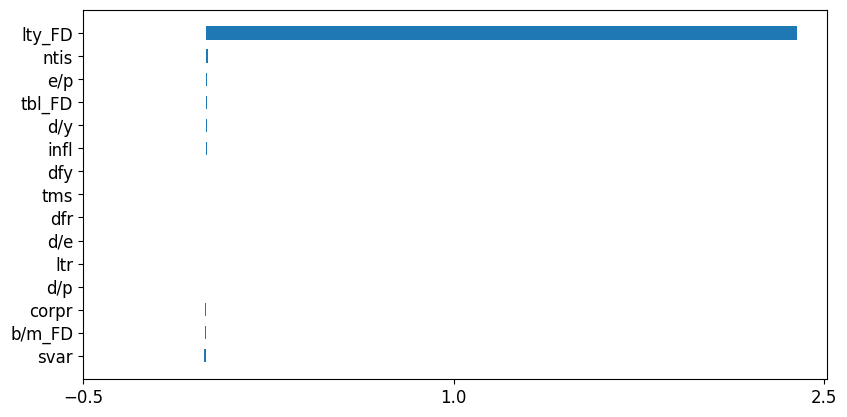

In [ ]:
m_imps=mda_imps.reset_index().rename(index=int,columns={"index":"Feature",'mean':'Importance'}, inplace=False).set_index('Feature')
m_imps=m_imps.sort_values(by='Importance')
plot_importances(m_imps,scalefig=(1.5,1.0))

In [ ]:
m_imps

,Importance,std
Feature,,
svar,-0.009783,0.004284
b/m_FD,-0.005739,0.003528
corpr,-0.003877,0.002027
d/p,-0.003041,0.003045
ltr,-0.001965,0.005048
d/e,-0.001840,0.004675
dfr,-0.001243,0.003199
tms,-0.000717,0.003485
dfy,0.000253,0.002662


**Before normalizing the data we need to drop feature columns with negative feature importance score**

In [ ]:
mda_imps_2 = mda_imps.drop(['dfy', 'corpr', 'b/m_FD', 'infl', 'tbl_FD','svar','ltr','d/p'])
mda_imps_2

,mean,std
ntis,0.004699,0.002482
d/y,0.001870,0.004859
e/p,0.003815,0.004027
d/e,-0.001840,0.004675
tms,-0.000717,0.003485
dfr,-0.001243,0.003199
lty_FD,2.390696,0.088044


In [ ]:
mda_imps_2=mda_imps_2/mda_imps_2.sum()
mda_imps_2

,mean,std
ntis,0.001960,0.022410
d/y,0.000780,0.043861
e/p,0.001591,0.036352
d/e,-0.000768,0.042206
tms,-0.000299,0.031462
dfr,-0.000519,0.028879
lty_FD,0.997254,0.794830


**2.	If you obtain a different FI score for a feature in each cross validation subset, how is the overall FI score computed? (1 pt)**

**Solution**: The mean value is taken of the different Feat Imp score in each CV subset.

**3.	What are the top 5 most important features? What are the features with above average FI scores?**

**Solution**: We can see that the top 5 imp features are 'lty_FD','Index_FD','corp','ltr','E12_FD'

importance cutoff= 0.14285714285714285


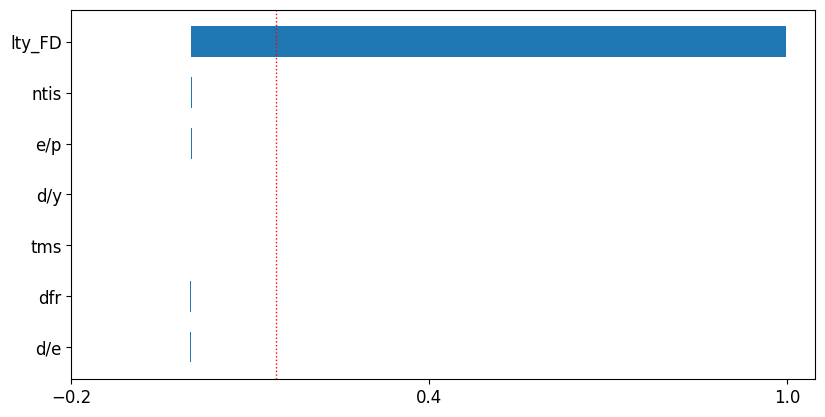

In [ ]:
m_imps_2=mda_imps_2.reset_index().rename(index=int,columns={"index":"Feature",'mean':'Importance'}, inplace=False).set_index('Feature')
m_imps_2=m_imps_2.sort_values(by='Importance')
plot_importances(m_imps_2,scalefig=(1.5,1.0), show_cutoff=True)

**4.	If you use only those above-average features as input, and retrain a RF as in Module 4 assignment to predict the same labels, does any of the performance metrics improve?**

In [ ]:
X_processed_seed1 = X_train_data[['lty_FD','d/e','tms']]
X_processed_seed1.head()
X_processed_test_seed1 = X_test_data[['lty_FD','d/e','tms']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_processed_seed1,Y_train_data.astype('int'))
y_pred_seed1=clf.predict(X_processed_test_seed1)
y_trainpred_seed1 = clf.predict(X_processed_seed1)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print('The predictive stats on train data with top5 features')
print("Accuracy:",metrics.accuracy_score(Y_train_data.astype('int'), y_trainpred_seed1))
print("F1 SCORE:",metrics.f1_score(Y_train_data.astype('int'),y_trainpred_seed1))
print("AUC score:",metrics.roc_auc_score(Y_train_data.astype('int'),y_trainpred_seed1))
print("*"*15)
print('The predictive stats on test data with top5 features')
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test_data.astype('int'), y_pred_seed1))
print("F1 SCORE:",metrics.f1_score(Y_test_data.astype('int'),y_pred_seed1))
print("AUC score:",metrics.roc_auc_score(Y_test_data.astype('int'),y_pred_seed1))

The predictive stats on train data with top5 features
Accuracy: 1.0
F1 SCORE: 1.0
AUC score: 1.0
***************
The predictive stats on test data with top5 features
Accuracy: 0.7045454545454546
F1 SCORE: 0.8194444444444444
AUC score: 0.533498759305211


In [ ]:
import pickle
filename = '/content/top5featRF-seed1.sav'
pickle.dump(clf, open(filename, 'wb'))

**Solution**:
Since there are only 14 features in the whole dataset we could argue feature selection wouldn;t really matter when the number of features are quite less as stated in the paper "The best way to select features? Comparing MDA, LIME and SHAP" - Ernst Chan and Xin Man where we can see Boston House Data model performance doesnt improve much since the given feature set itself is small (only 13 features.) The improved Stats are a bit change in Accuracy and a good improved in F1 score. The F1 score has improved though which could shows there are low false positives and low false negatives, so we are able to correctly identifying the profitable strategies which we were incorrectly leaving out in our Model(which wasnt optimized) and also able to reduce the chances of selecting the loss making strategies which were taken by our earlier model.


**5. Now set the random seed to 2, and re-compute part 3. Are they different? (Hint: see Man, Xin and Chan, Ernest. 2020. “The best way to select features?“. The Journal of
Financial Data Science, Vol 3, Issue 1, 2021.)**

**Solution**:

We can see as stated in the paper "Man, Xin and Chan, Ernest. 2020. “The best way to select features?“. The Journal of Financial Data Science, Vol 3, Issue 1, 2021." The feature importance score changes with a different seed.


In [ ]:
np.random.seed(2)

In [ ]:
X_train_data_2, X_valid_data_2, X_test_data_2=train_valid_test_split(X_data_2, trainFrac, validFrac)
Y_train_data_2, Y_valid_data_2, Y_test_data_2=train_valid_test_split(y_data_2, trainFrac, validFrac)

In [ ]:
clf=DecisionTreeClassifier(criterion='entropy',max_features=1,class_weight='balanced',min_weight_fraction_leaf=0,random_state=2)
clf=BaggingClassifier(base_estimator=clf,n_estimators=1000,max_features=1,max_samples=1.,oob_score=True,n_jobs=-1,random_state=2)
mda_imps_seed2=featImpMDA_classify(clf,X_train_data_2,Y_train_data_2,cv=10, scoring='neg_log_loss')


start MDA 2023-10-10 06:49:54.734160
 Split 1
 Split 2
 Split 3
 Split 4
 Split 5
 Split 6
 Split 7
 Split 8
 Split 9
 Split 10
end MDA 2023-10-10 06:52:00.472992


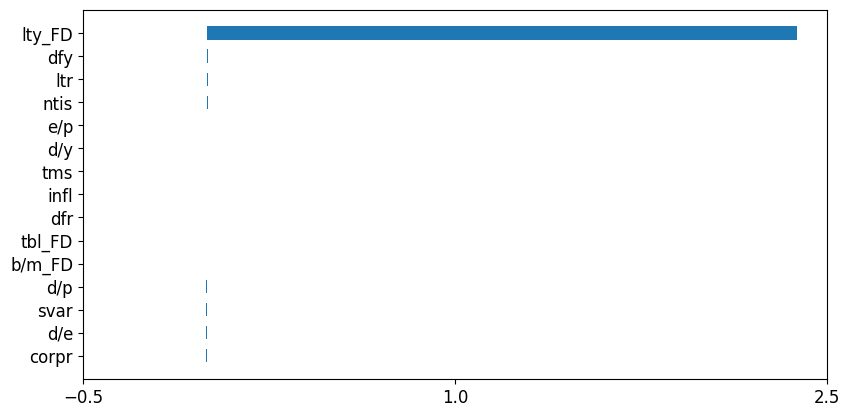

In [ ]:
m_imps_seed2=mda_imps_seed2.reset_index().rename(index=int,columns={"index":"Feature",'mean':'Importance'}, inplace=False).set_index('Feature')
m_imps_seed2=m_imps_seed2.sort_values(by='Importance')
plot_importances(m_imps_seed2,scalefig=(1.5,1.0))

In [ ]:
m_imps_seed2

,Importance,std
Feature,,
corpr,-0.005416,0.003700
d/e,-0.003891,0.003712
svar,-0.003617,0.003944
d/p,-0.001817,0.003053
b/m_FD,-0.000542,0.004335
tbl_FD,-0.000031,0.003063
dfr,0.000400,0.003173
infl,0.000464,0.003090
tms,0.001867,0.003461


In [ ]:
mda_imps_seed2 = mda_imps_seed2.drop(['svar','corpr','d/p','ltr','b/m_FD','dfy','tms'])
mda_imps_seed2

,mean,std
ntis,0.003867,0.002707
infl,0.000464,0.003090
d/y,0.001877,0.003940
e/p,0.002217,0.003565
d/e,-0.003891,0.003712
dfr,0.000400,0.003173
tbl_FD,-0.000031,0.003063
lty_FD,2.378209,0.096378


In [ ]:
mda_imps_seed2=mda_imps_seed2/mda_imps_seed2.sum()
mda_imps_seed2

,mean,std
ntis,0.001623,0.022631
infl,0.000195,0.025831
d/y,0.000788,0.032938
e/p,0.000930,0.029803
d/e,-0.001633,0.031030
dfr,0.000168,0.026526
tbl_FD,-0.000013,0.025607
lty_FD,0.997942,0.805634


**6. Retrain your RF model using the above-average features obtained in part 5). Does any of the performance metrics improve over the Module 4 results? How do these metrics compared to those in part 4 above?**

importance cutoff= 0.125


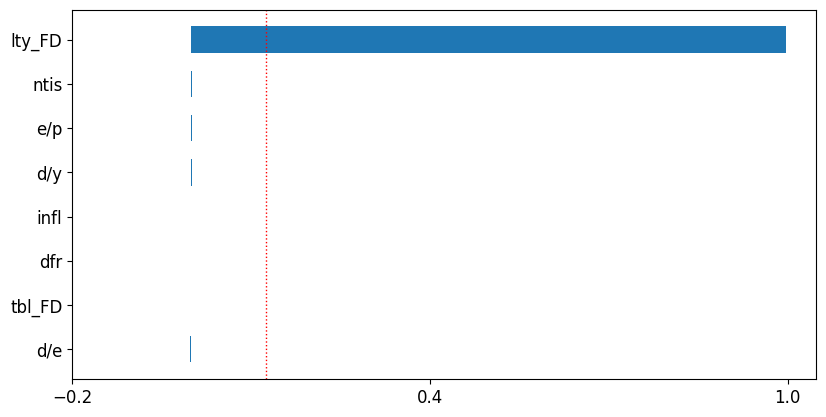

In [ ]:
m_imps_seed2=mda_imps_seed2.reset_index().rename(index=int,columns={"index":"Feature",'mean':'Importance'}, inplace=False).set_index('Feature')
m_imps_seed2=m_imps_seed2.sort_values(by='Importance')
plot_importances(m_imps_seed2,scalefig=(1.5,1.0), show_cutoff=True)


In [ ]:
X_processed_seed2 = X_train_data_2[['e/p','d/e','infl']]
X_processed_seed2.head()
X_processed_test_seed2 = X_test_data_2[['e/p','d/e','infl']]

In [ ]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X_processed, y_train2, test_size=0.3) # 70% training and 30% test
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_processed_seed2,Y_train_data_2.astype('int'))
y_trainpred_seed2 = clf.predict(X_processed_seed2)
y_pred_seed2=clf.predict(X_processed_test_seed2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print('The predictive stats on train data with top5 features')
print("Accuracy:",metrics.accuracy_score(Y_train_data_2.astype('int'), y_trainpred_seed2))
print("F1 SCORE:",metrics.f1_score(Y_train_data_2.astype('int'),y_trainpred_seed2))
print("AUC score:",metrics.roc_auc_score(Y_train_data_2.astype('int'),y_trainpred_seed2))
print("*"*15)
print('The predictive stats on test data with top5 features')
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test_data_2.astype('int'), y_pred_seed2))
print("F1 SCORE:",metrics.f1_score(Y_test_data_2.astype('int'),y_pred_seed2))
print("AUC score:",metrics.roc_auc_score(Y_test_data_2.astype('int'),y_pred_seed2))

The predictive stats on train data with top5 features
Accuracy: 1.0
F1 SCORE: 1.0
AUC score: 1.0
***************
The predictive stats on test data with top5 features
Accuracy: 0.5340909090909091
F1 SCORE: 0.6168224299065419
AUC score: 0.5353598014888337


**Solution**: Compared to the part 4 the performance doesnt show any significant change and shows no improvemnt and the model Performance in Module 4 is still better for which we can think about the less number of feature set available which wont increase much of the performance as seen in the Boston Dataset from the paper "The best way to select features? Comparing MDA, LIME and SHAP" - Ernst Chan and Xin Man Also with the training dataset we are still massively overfitting the dataset which we need to apply some cross validation

In [ ]:
clf

RandomForestClassifier()

In [ ]:
import pickle
filename = 'top5featRF-seed2.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# X_processed_seed2.to_csv('Data/train_seed2.csv')
# Y_train_data_2.to_csv('Data/train_out_seed2.csv')
# X_processed_test_seed2.to_csv('Data/test_seed2.csv')
# Y_test_data_2.to_csv('Data/test_out_seed2.csv')
# X_processed_seed1.to_csv('Data/train_seed1.csv')
# Y_train_data.to_csv('Data/train_out_seed1.csv')
# X_processed_test_seed1.to_csv('Data/test_seed1.csv')
# Y_test_data.to_csv('Data/test_out_seed1.csv')